# 📊 Proyecto Guiado - Análisis de Ventas de Videojuegos
## Parte 4: Análisis Estadístico Avanzado

---

### 🎯 Objetivos de este notebook:
1. Analizar correlaciones entre variables
2. Realizar análisis estadísticos por grupos
3. Estudiar tendencias temporales
4. Comparar comportamiento entre regiones
5. Extraer insights de negocio

---

## 1. Cargar librerías y datos limpios

In [1]:
%pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importar librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import streamlit as st

# Configuraciones
sns.set(style="whitegrid")

# Cargar dataset limpio
df_clean = pd.read_csv('vgsales_clean.csv')


---
## 2. Análisis de Correlaciones

### 2.1 Matriz de Correlación

La correlación mide la relación lineal entre dos variables:
- **1**: Correlación positiva perfecta
- **0**: Sin correlación
- **-1**: Correlación negativa perfecta

In [6]:
# Seleccionar variables numéricas relevantes
df_clean_num = df_clean[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]

# Calcular matriz de correlación
correlation_matrix = df_clean_num.corr()


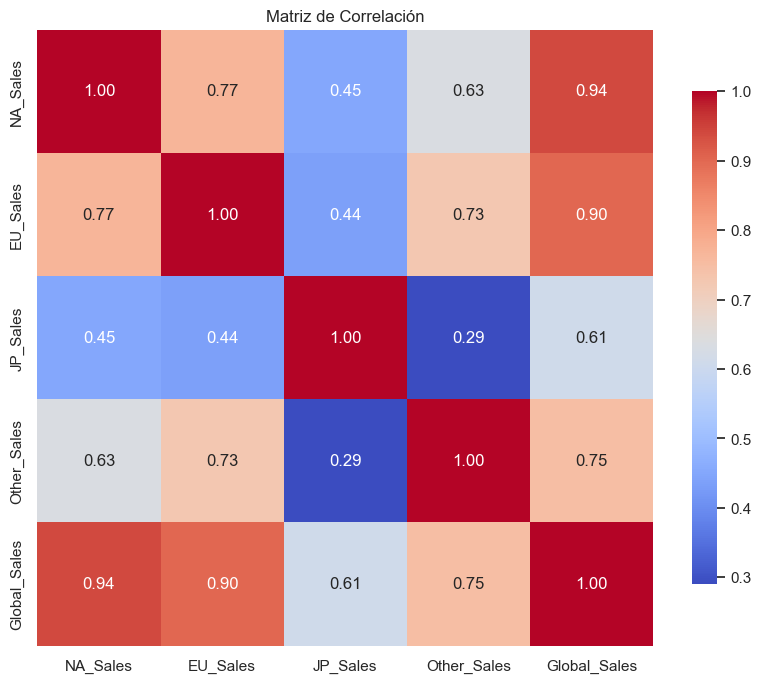

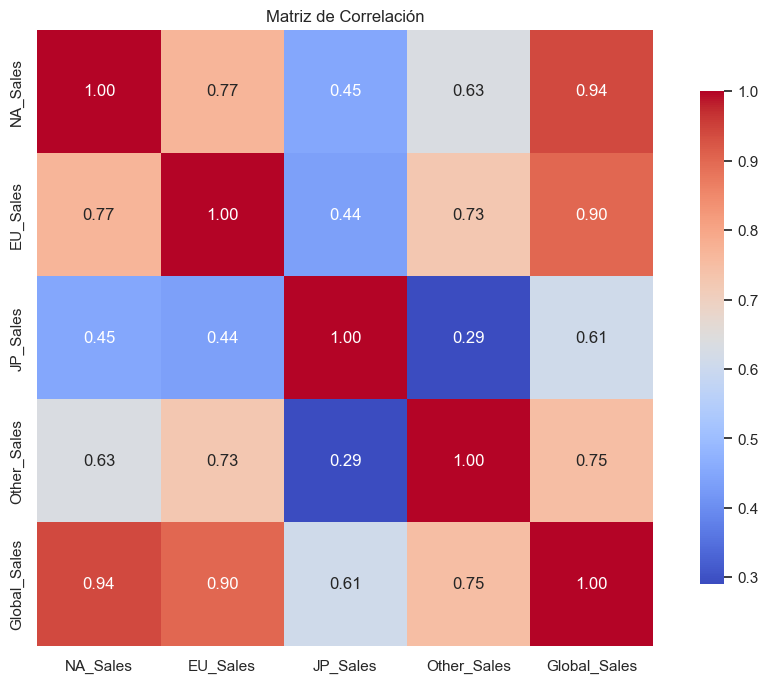

In [7]:
# Visualización de la matriz de correlación con heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Matriz de Correlación")
plt.show()  

# Crear heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Matriz de Correlación")
plt.show()


### 2.2 Scatter Plots - Relaciones entre Variables

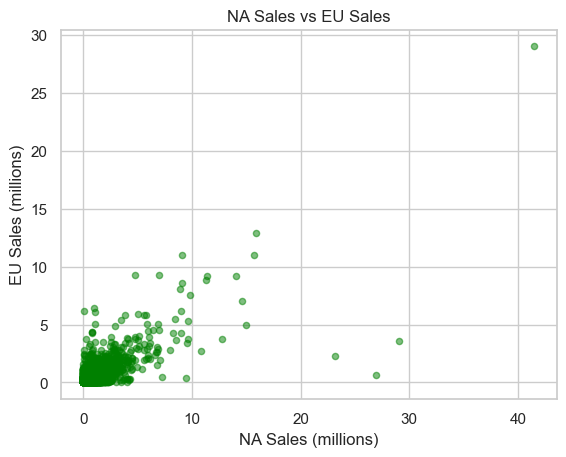

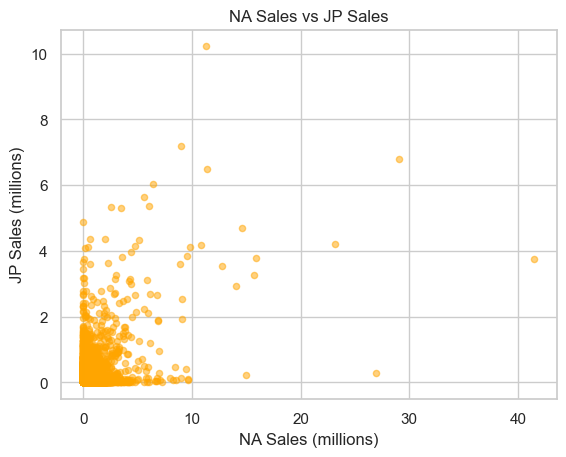

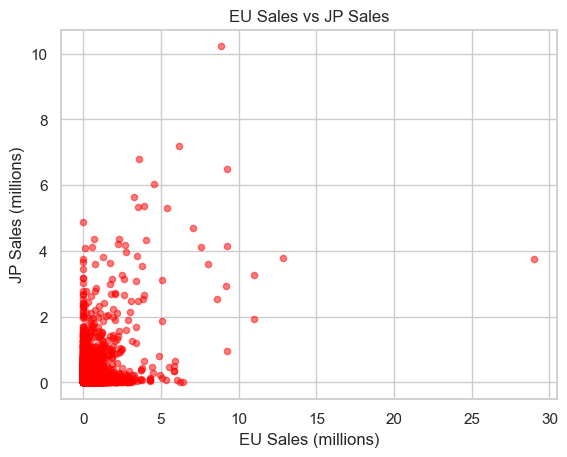

In [11]:
# Scatter plot: NA vs EU sales

df_clean.plot(kind='scatter', x='NA_Sales', y='EU_Sales', alpha=0.5, color='green')
plt.title('NA Sales vs EU Sales')
plt.xlabel('NA Sales (millions)')
plt.ylabel('EU Sales (millions)')
plt.grid(True)
plt.show()
# NA vs EU


# NA vs JP

df_clean.plot(kind='scatter',x = 'NA_Sales', y = 'JP_Sales', alpha=0.5, color='orange')
plt.title('NA Sales vs JP Sales')
plt.xlabel('NA Sales (millions)')
plt.ylabel('JP Sales (millions)')
plt.grid(True)
plt.show()

# EU vs JP

df_clean.plot(kind='scatter',x = 'EU_Sales', y = 'JP_Sales', alpha=0.5, color='red')
plt.title('EU Sales vs JP Sales')
plt.xlabel('EU Sales (millions)')
plt.ylabel('JP Sales (millions)')
plt.grid(True)
plt.show()


---
## 3. Análisis por Grupos

### 3.1 Ventas Promedio por Género

/var/folders/m6/9v0_yl357zx85v4fgqtpsfj00000gn/T/ipykernel_27344/3512903279.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_clean_genre, x='Genre', y='Total_Sales', palette='viridis')


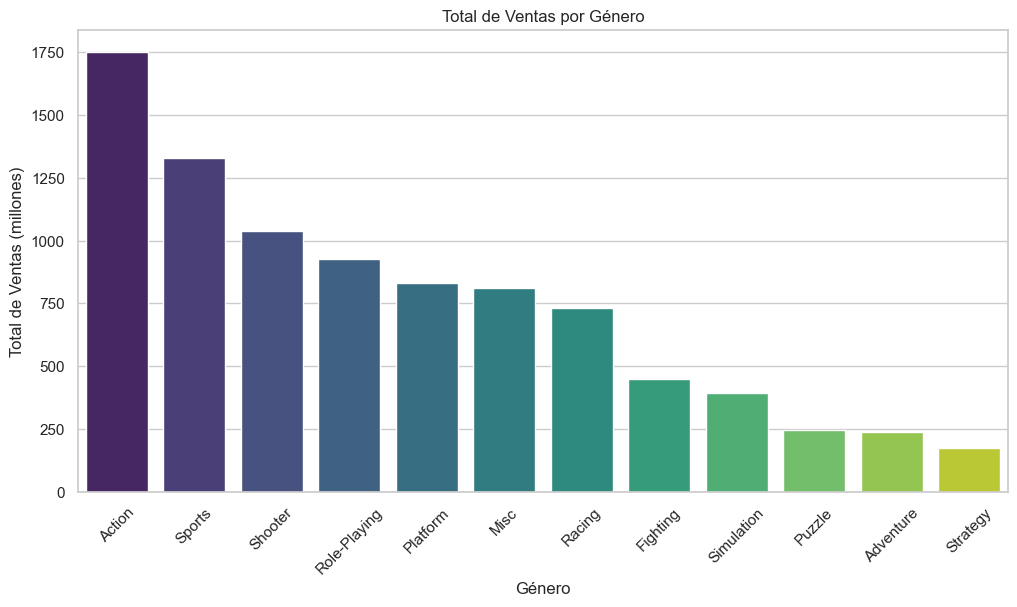

,Genre,Mean_Sales
0,Action,0.528100
10,Sports,0.567319
8,Shooter,0.791885
7,Role-Playing,0.623233
4,Platform,0.938341
3,Misc,0.465762
6,Racing,0.586101
2,Fighting,0.529375
9,Simulation,0.452364
5,Puzzle,0.420876


In [14]:
# Análisis por género

df_clean['Genre'].value_counts()
# Agrupar por género y calcular estadísticas
df_clean_genre = df_clean.groupby('Genre').agg({
    'Global_Sales': ['sum', 'mean', 'median', 'std', 'count']
}).reset_index()
df_clean_genre.columns = ['Genre', 'Total_Sales', 'Mean_Sales', 'Median_Sales', 'Std_Dev_Sales', 'Count']
df_clean_genre = df_clean_genre.sort_values(by='Total_Sales', ascending=False)
df_clean_genre

# Visualización
plt.figure(figsize=(12, 6))
sns.barplot(data=df_clean_genre, x='Genre', y='Total_Sales', palette='viridis')
plt.title('Total de Ventas por Género')
plt.xlabel('Género')
plt.ylabel('Total de Ventas (millones)')
plt.xticks(rotation=45)
plt.show()

# Total de ventas por género
df_clean_genre[['Genre', 'Total_Sales']]

# Promedio de ventas por género
df_clean_genre[['Genre', 'Mean_Sales']]


### 3.2 Preferencias de Género por Región

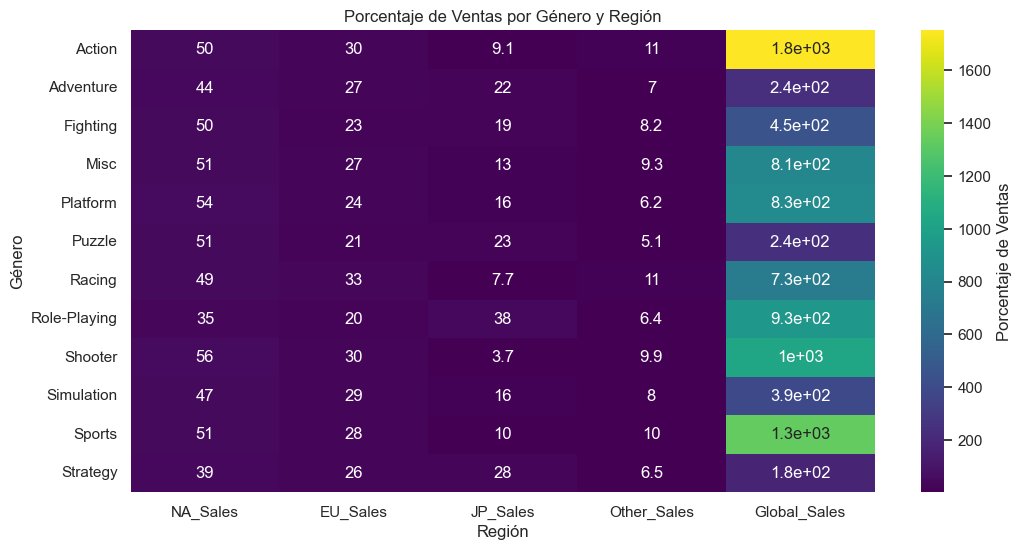

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Decade,Sales_Category,Total_Sales,NA_Percent,EU_Percent,JP_Percent,Other_Percent,Platform_Type
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,2000.0,Éxito,82.74,50.145033,35.073725,4.556442,10.224801,Consola
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1980.0,Éxito,40.24,72.266402,8.896620,16.923459,1.913519,Portátil
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,2000.0,Éxito,35.83,44.236673,35.947530,10.577728,9.238069,Consola
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,2000.0,Éxito,33.00,47.727273,33.363636,9.939394,8.969697,Consola
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,1990.0,Éxito,31.38,35.914595,28.330147,32.568515,3.186743,Portátil


In [19]:
# Ventas por género y región

# Agrupar ventas por género para cada región
df_genre_region = df_clean.groupby('Genre').agg({
    'NA_Sales': 'sum',
    'EU_Sales': 'sum',
    'JP_Sales': 'sum',
    'Other_Sales': 'sum',
    'Global_Sales': 'sum'
}).reset_index()        
# Calcular porcentajes
df_genre_region['NA_Sales'] = df_genre_region['NA_Sales'] / df_genre_region['Global_Sales'] * 100
df_genre_region['EU_Sales'] = df_genre_region['EU_Sales'] / df_genre_region['Global_Sales'] * 100
df_genre_region['JP_Sales'] = df_genre_region['JP_Sales'] / df_genre_region['Global_Sales'] * 100
df_genre_region['Other_Sales'] = df_genre_region['Other_Sales'] / df_genre_region['Global_Sales'] * 100

# Visualización con heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_genre_region.set_index('Genre'), annot=True, cmap='viridis', cbar_kws={'label': 'Porcentaje de Ventas'})
plt.title('Porcentaje de Ventas por Género y Región')
plt.xlabel('Región')
plt.ylabel('Género')
plt.show()

df_clean.head()

### 3.3 Análisis por Plataforma

/var/folders/m6/9v0_yl357zx85v4fgqtpsfj00000gn/T/ipykernel_27344/172956110.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_clean['Platform'].value_counts().index, y=df_clean['Platform'].value_counts().values, palette='dark')


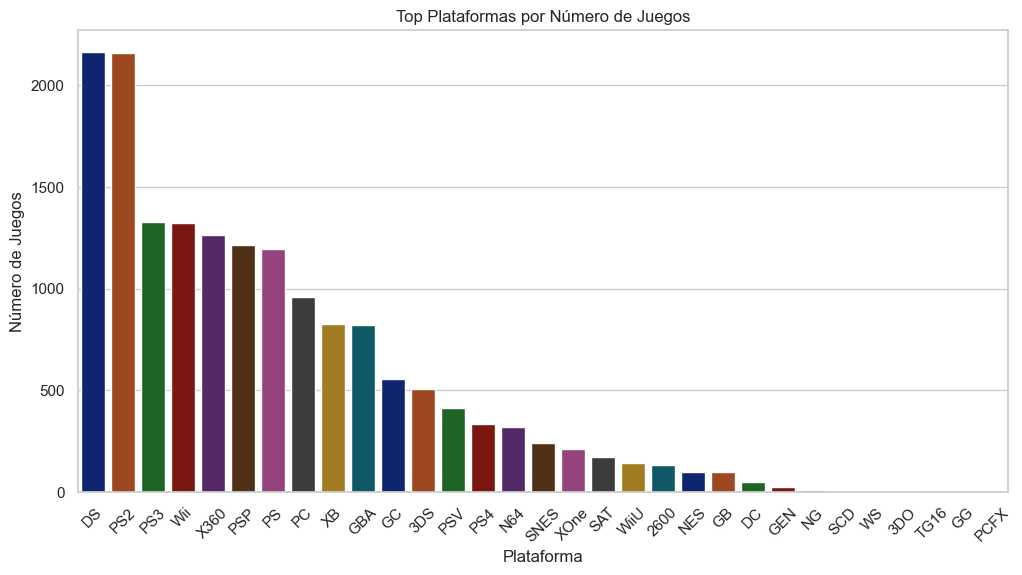

In [23]:
# Top plataformas

df_clean['Platform'].value_counts()
# Visualización
plt.figure(figsize=(12, 6))
sns.barplot(x=df_clean['Platform'].value_counts().index, y=df_clean['Platform'].value_counts().values, palette='dark')
plt.title('Top Plataformas por Número de Juegos')
plt.xlabel('Plataforma')
plt.ylabel('Número de Juegos')
plt.xticks(rotation=45)
plt.show()

# Por ventas totales
ventas_totales = df_clean.groupby('Platform')['Global_Sales'].sum().reset_index()
ventas_totales = ventas_totales.sort_values(by='Global_Sales', ascending=False)

# Por ventas promedio
ventas_promedio = df_clean.groupby('Platform')['Global_Sales'].mean().reset_index()
ventas_promedio = ventas_promedio.sort_values(by='Global_Sales', ascending=False)


### 3.4 Análisis por Tipo de Plataforma

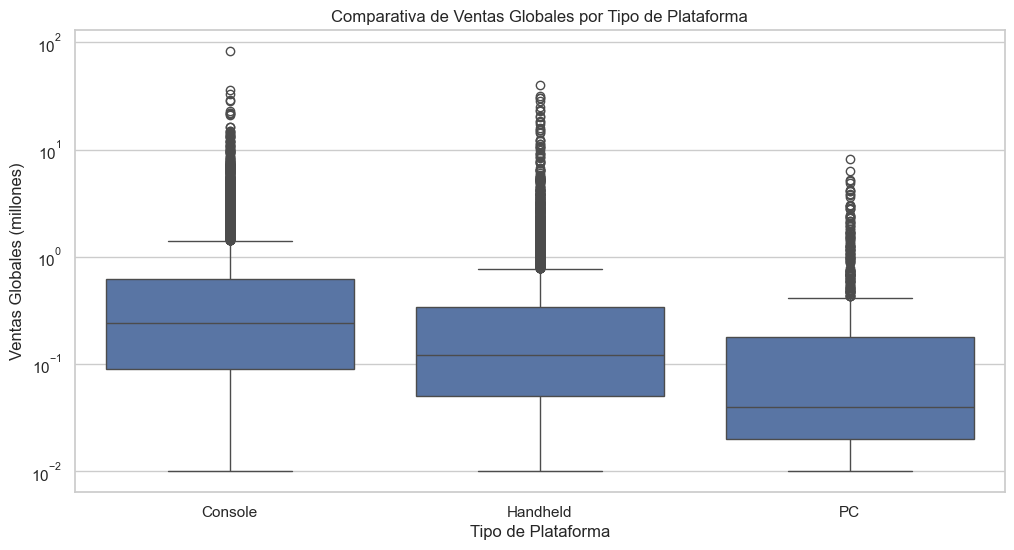

In [24]:
# Comparar Consola vs Portátil vs PC
df_clean['Platform_Type'] = df_clean['Platform'].apply(lambda x: 'Console' if x in ['PS4', 'XOne', 'PS3', 'X360', 'WiiU', 'Wii', 'PS2', 'PS', 'X', 'GC', 'N64'] else ('PC' if x == 'PC' else 'Handheld'))           

# Boxplot comparativo
plt.figure(figsize=(12, 6))
sns.boxplot(x='Platform_Type', y='Global_Sales', data=df_clean)
plt.title('Comparativa de Ventas Globales por Tipo de Plataforma')
plt.xlabel('Tipo de Plataforma')
plt.ylabel('Ventas Globales (millones)')
plt.yscale('log')
plt.show()


---
## 4. Análisis Temporal

### 4.1 Evolución de Ventas por Año

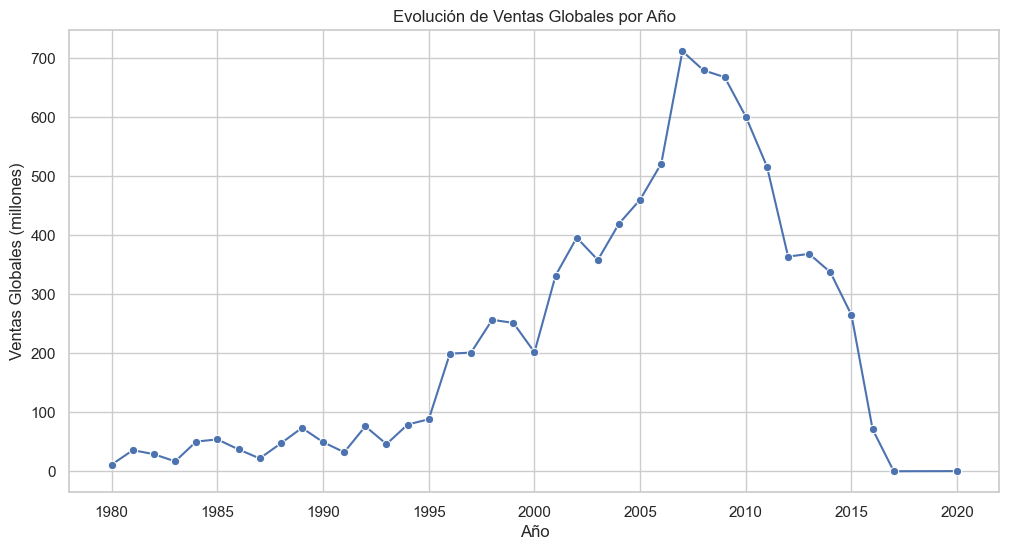

La venta anual es 8920.44 millones


In [33]:
# Ventas anuales
venta_anual = df_clean['Global_Sales'].sum()
# Agrupar ventas globales por año
ventas_por_ano = df_clean.groupby('Year')['Global_Sales'].sum().reset_index()

# Visualización de la evolución de ventas por año
plt.figure(figsize=(12, 6))
sns.lineplot(data=ventas_por_ano, x='Year', y='Global_Sales', marker='o')
plt.title('Evolución de Ventas Globales por Año')
plt.xlabel('Año')
plt.ylabel('Ventas Globales (millones)')
plt.grid(True)
plt.show()
# Visualización
print(f'La venta anual es {venta_anual.round(2)} millones')
# Ventas totales por año

# Visualización


# Cantidad de juegos por año



### 4.2 Evolución por Región

In [ ]:
# Ventas por región a lo largo del tiempo


# Visualización


### 4.3 Análisis por Década

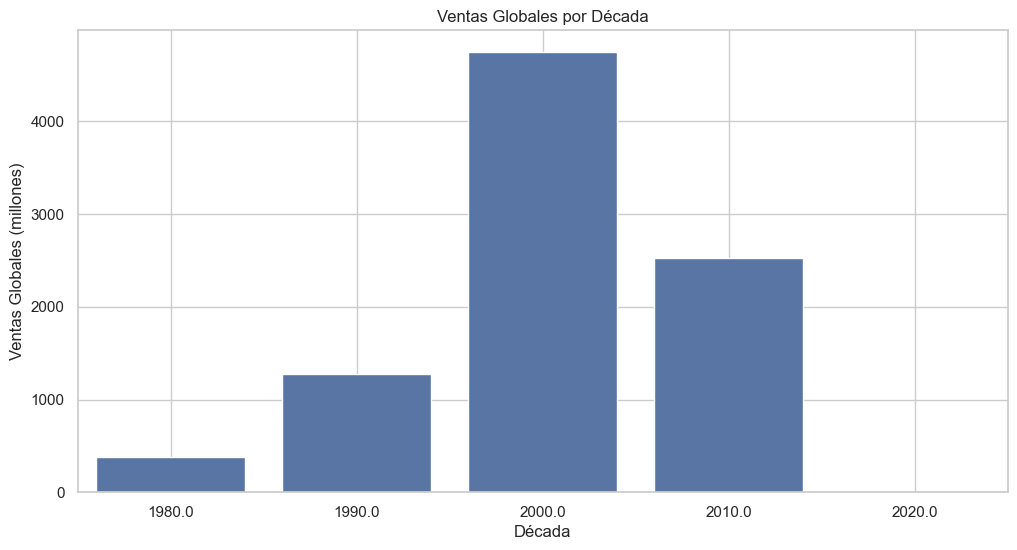

   Decade  Global_Sales
0  1980.0        376.58
1  1990.0       1278.91
2  2000.0       4744.10
3  2010.0       2520.56
4  2020.0          0.29


In [37]:
# Análisis por década

df_clean['Decade'] = (df_clean['Year'] // 10) * 10
# Visualización
ventas_por_decada = df_clean.groupby('Decade')['Global_Sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=ventas_por_decada, x='Decade', y='Global_Sales')
plt.title('Ventas Globales por Década')
plt.xlabel('Década')
plt.ylabel('Ventas Globales (millones)')
plt.grid(True)
plt.show()

# Ventas totales por década
ventas_totales_por_decada = df_clean.groupby('Decade')['Global_Sales'].sum().reset_index()
print(ventas_totales_por_decada)

# Distribución regional por década (stacked bar)



---
## 5. Análisis de Publishers

### 5.1 Top Publishers

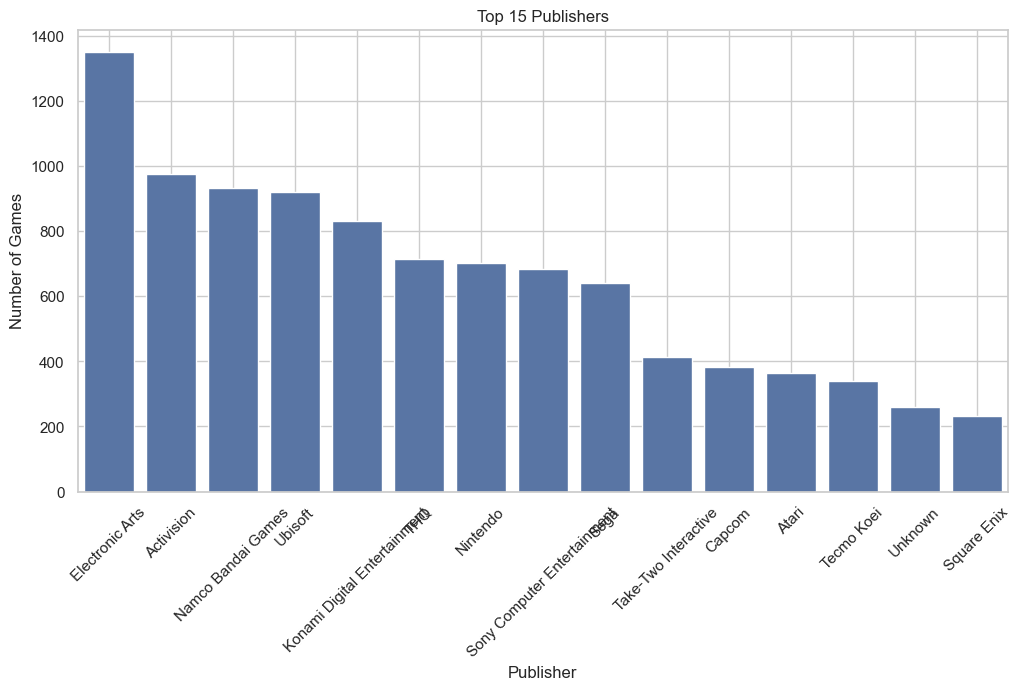

                       Publisher  Global_Sales
0                     Activision        727.46
1                          Atari        157.22
2                         Capcom        200.89
3                Electronic Arts       1110.32
4   Konami Digital Entertainment        283.64
5             Namco Bandai Games        254.09
6                       Nintendo       1786.56
7                           Sega        272.99
8    Sony Computer Entertainment        607.50
9                    Square Enix        145.18
10                           THQ        340.77
11          Take-Two Interactive        399.54
12                    Tecmo Koei         53.55
13                       Ubisoft        474.72
14                       Unknown         49.54
                       Publisher  Number of Games
0                     Activision              975
1                          Atari              363
2                         Capcom              381
3                Electronic Arts             135

In [39]:
# Top 15 publishers
top_publishers = df_clean['Publisher'].value_counts().head(15)

# Visualización
plt.figure(figsize=(12, 6))
sns.barplot(x=top_publishers.index, y=top_publishers.values)
plt.title('Top 15 Publishers')
plt.xlabel('Publisher')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Ventas totales
ventas_totales_por_editor = df_clean[df_clean['Publisher'].isin(top_publishers.index)].groupby('Publisher')['Global_Sales'].sum().reset_index()
print(ventas_totales_por_editor)

# Cantidad de juegos por editor
cantidad_juegos_por_editor = df_clean[df_clean['Publisher'].isin(top_publishers.index)].groupby('Publisher')['Name'].count().reset_index()
cantidad_juegos_por_editor.columns = ['Publisher', 'Number of Games']
print(cantidad_juegos_por_editor)


---
## 6. Análisis de Éxitos (Mega-hits)

### 6.1 Características de los Juegos Más Exitosos

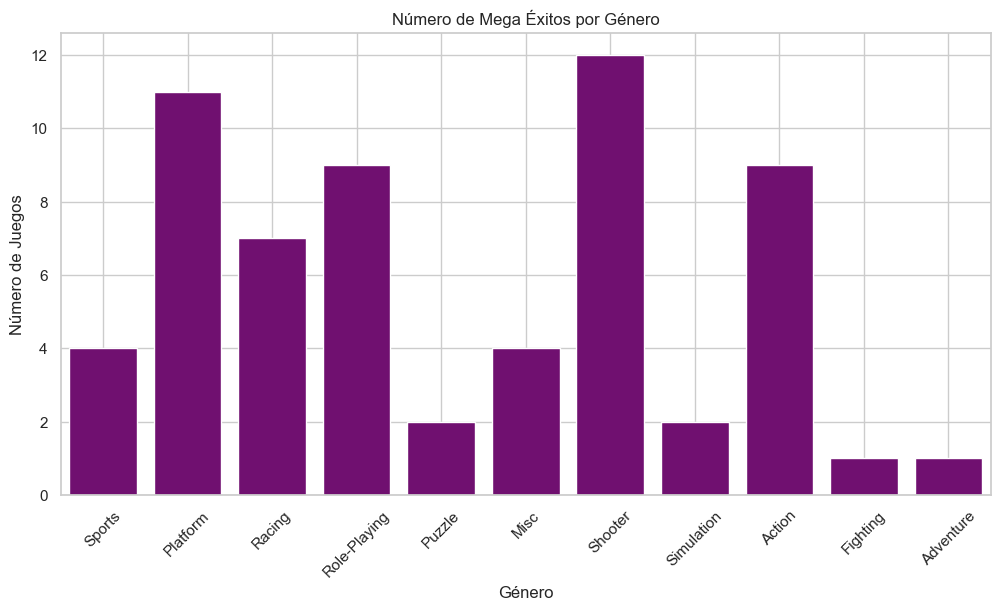

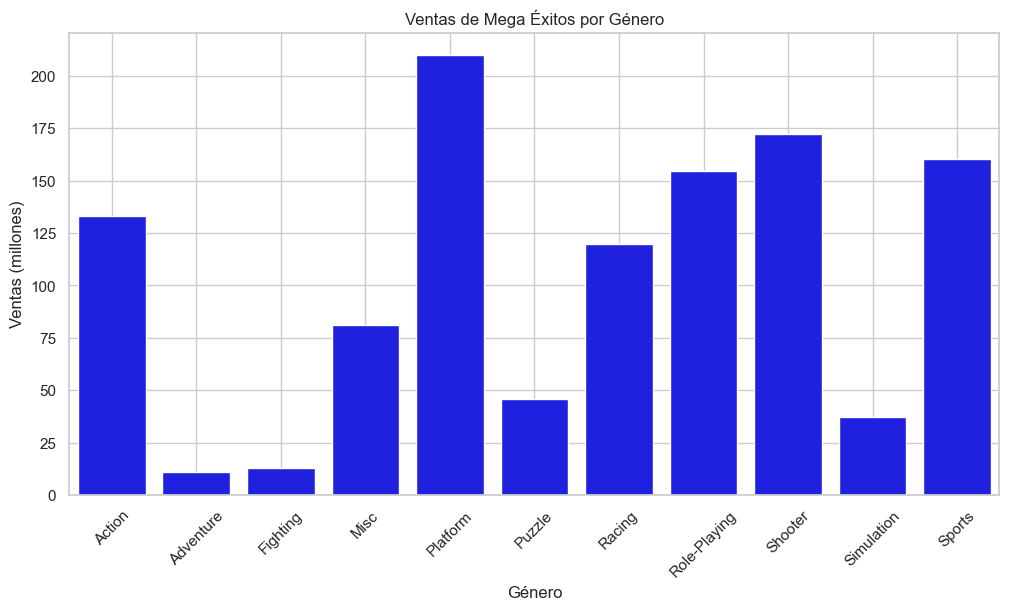

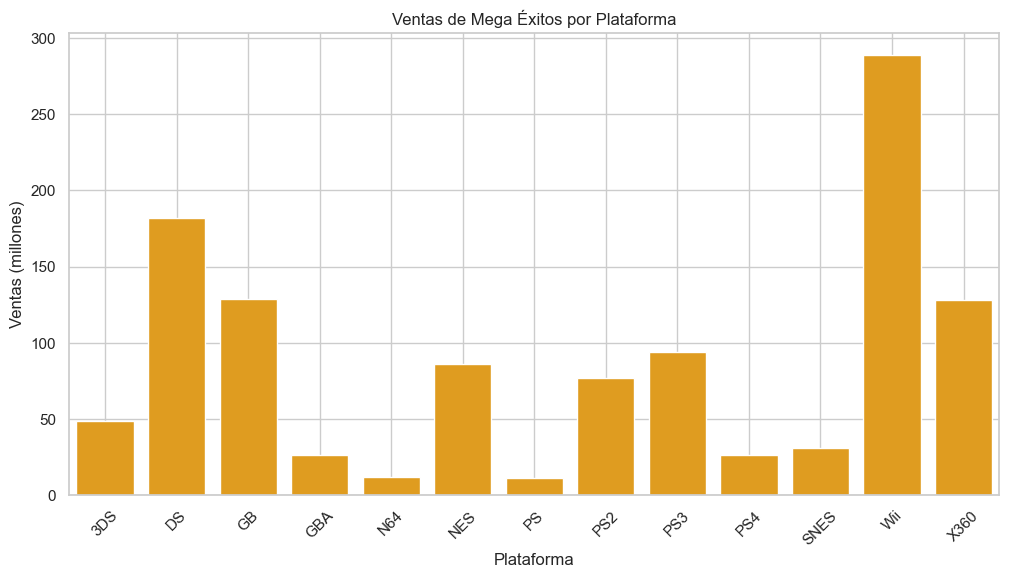

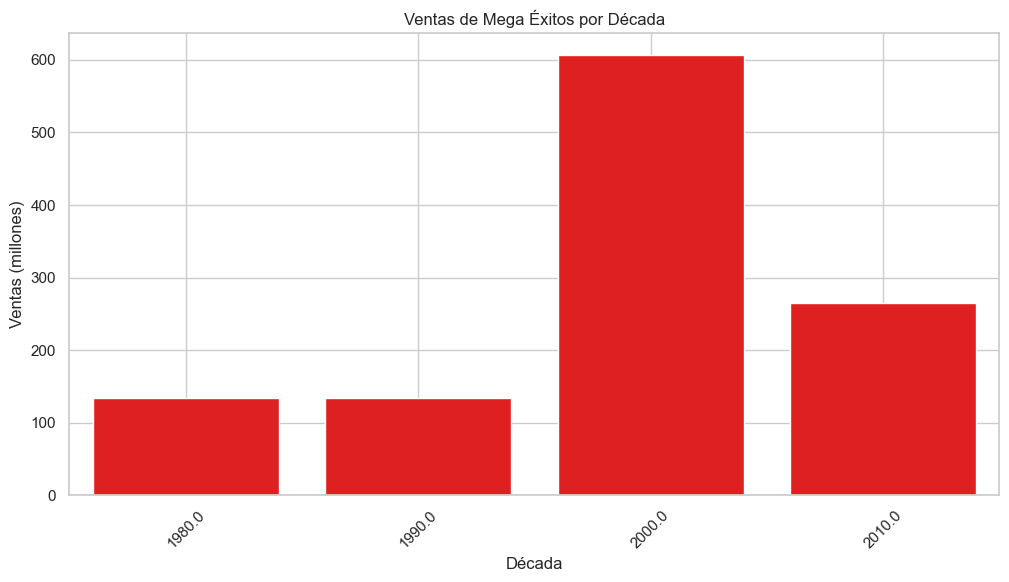

In [46]:
# Analizar juegos mega-éxito (>10M ventas)

mega_exitos = df_clean[df_clean['Global_Sales'] > 10]
# Visualización
plt.figure(figsize=(12, 6))
sns.countplot(data=mega_exitos, x='Genre', color='purple')
plt.title('Número de Mega Éxitos por Género')
plt.xlabel('Género')
plt.ylabel('Número de Juegos')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Por género
ventas_por_genero = mega_exitos.groupby('Genre')['Global_Sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=ventas_por_genero, x='Genre', y='Global_Sales',color='blue')
plt.title('Ventas de Mega Éxitos por Género')
plt.xlabel('Género')
plt.ylabel('Ventas (millones)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Por plataforma
ventas_por_plataforma = mega_exitos.groupby('Platform')['Global_Sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=ventas_por_plataforma, x='Platform', y='Global_Sales', color='orange')
plt.title('Ventas de Mega Éxitos por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas (millones)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Por década
ventas_por_decada = mega_exitos.groupby('Decade')['Global_Sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=ventas_por_decada, x='Decade', y='Global_Sales', color='red')
plt.title('Ventas de Mega Éxitos por Década')
plt.xlabel('Década')
plt.ylabel('Ventas (millones)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Por región dominante
